In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.append('/home/hrai/codes/hpe_library')
from lib_import import *
from my_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
h36m_3d_world, h36m_cam_param = load_h36m()

==> Loading 3D data wrt World CS...


In [31]:
subject = 'S5'
action = 'Waiting 1'
camera_id = '54138969'
target_video = f'{subject}_{action}_{camera_id}'

pose3d_list = h36m_3d_world._data[subject][action]['positions'].copy()
calibration_matrix, camera_param, H, W, fx, fy, cx, cy = get_h36m_camera_info(h36m_3d_world, h36m_cam_param, subject, action, camera_id)

pose_2d_list, cam_3d_list, img_3d_list, img_3d_hat_list, img_25d_list, scale_list = h36m_data_processing(pose3d_list.copy(), camera_param, fx, fy, cx, cy, length=-1)

In [32]:
pose3d_list.shape

(4517, 17, 3)

In [61]:
gt_3d_pos = pose3d_list.copy()
gt_length = get_h36m_limb_lens(gt_3d_pos.copy()) # (243, 16)
gt_ref = gt_length[:, len_ids['R_HIP']] + gt_length[:, len_ids['L_HIP']]
max_length = gt_length.max()

gt_3d_pos.shape, max_length

((4517, 17, 3), 0.4424443)

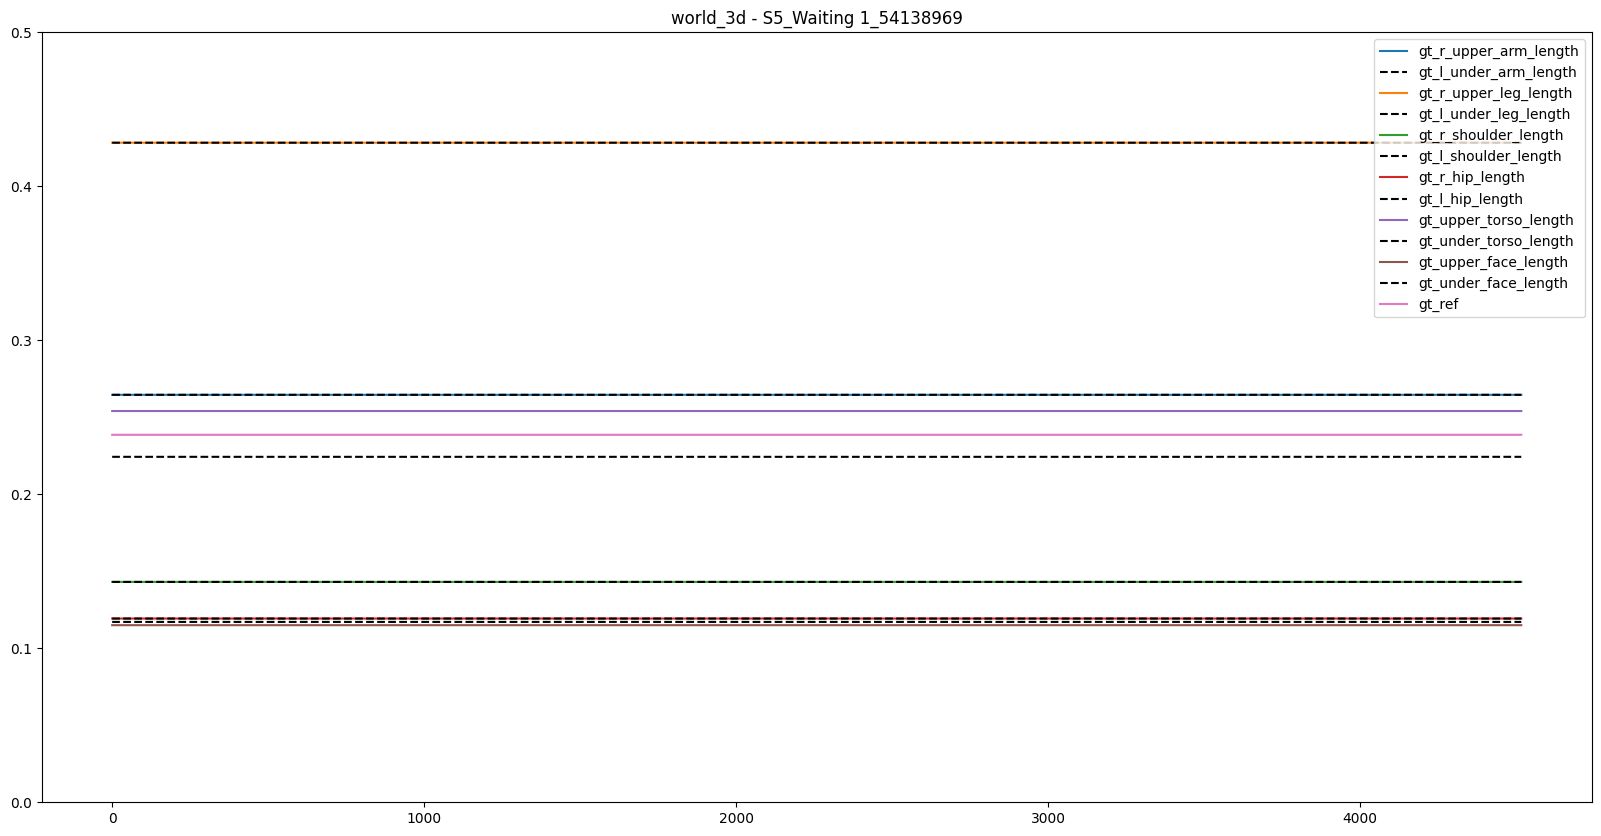

In [62]:
%matplotlib inline
fig = plt.figure(9, figsize=(20, 10))
fig.clear()
ax1 = fig.add_subplot(111)
ax1.plot(gt_length[:, len_ids['R_UPPER_ARM']], label='gt_r_upper_arm_length')
ax1.plot(gt_length[:, len_ids['L_UPPER_ARM']], 'k--', label='gt_l_under_arm_length')
ax1.plot(gt_length[:, len_ids['R_UPPER_LEG']], label='gt_r_upper_leg_length')
ax1.plot(gt_length[:, len_ids['L_UPPER_LEG']], 'k--', label='gt_l_under_leg_length')
ax1.plot(gt_length[:, len_ids['R_SHOULDER']], label='gt_r_shoulder_length')
ax1.plot(gt_length[:, len_ids['L_SHOULDER']], 'k--', label='gt_l_shoulder_length')
ax1.plot(gt_length[:, len_ids['R_HIP']], label='gt_r_hip_length')
ax1.plot(gt_length[:, len_ids['L_HIP']], 'k--', label='gt_l_hip_length')
ax1.plot(gt_length[:, len_ids['UPPER_TORSO']], label='gt_upper_torso_length')
ax1.plot(gt_length[:, len_ids['UNDER_TORSO']], 'k--', label='gt_under_torso_length')
ax1.plot(gt_length[:, len_ids['UPPER_FACE']], label='gt_upper_face_length')
ax1.plot(gt_length[:, len_ids['UNDER_FACE']], 'k--', label='gt_under_face_length')
ax1.plot(gt_ref, label='gt_ref')
ax1.legend()
ax1.set_ylim(0, 0.5)
ax1.set_title(f'world_3d - {subject}_{action}_{camera_id}')

plt.show()

In [33]:
img_3d_list.shape

(4516, 17, 3)

In [63]:
gt_3d_pos = img_3d_list.copy()
gt_length = get_h36m_limb_lens(gt_3d_pos.copy()) # (243, 16)
gt_3d_pos.shape

(4516, 17, 3)

In [64]:
gt_ref = gt_length[:, len_ids['R_HIP']] + gt_length[:, len_ids['L_HIP']]
max_length = gt_length.max()
max_length

138.1651361383408

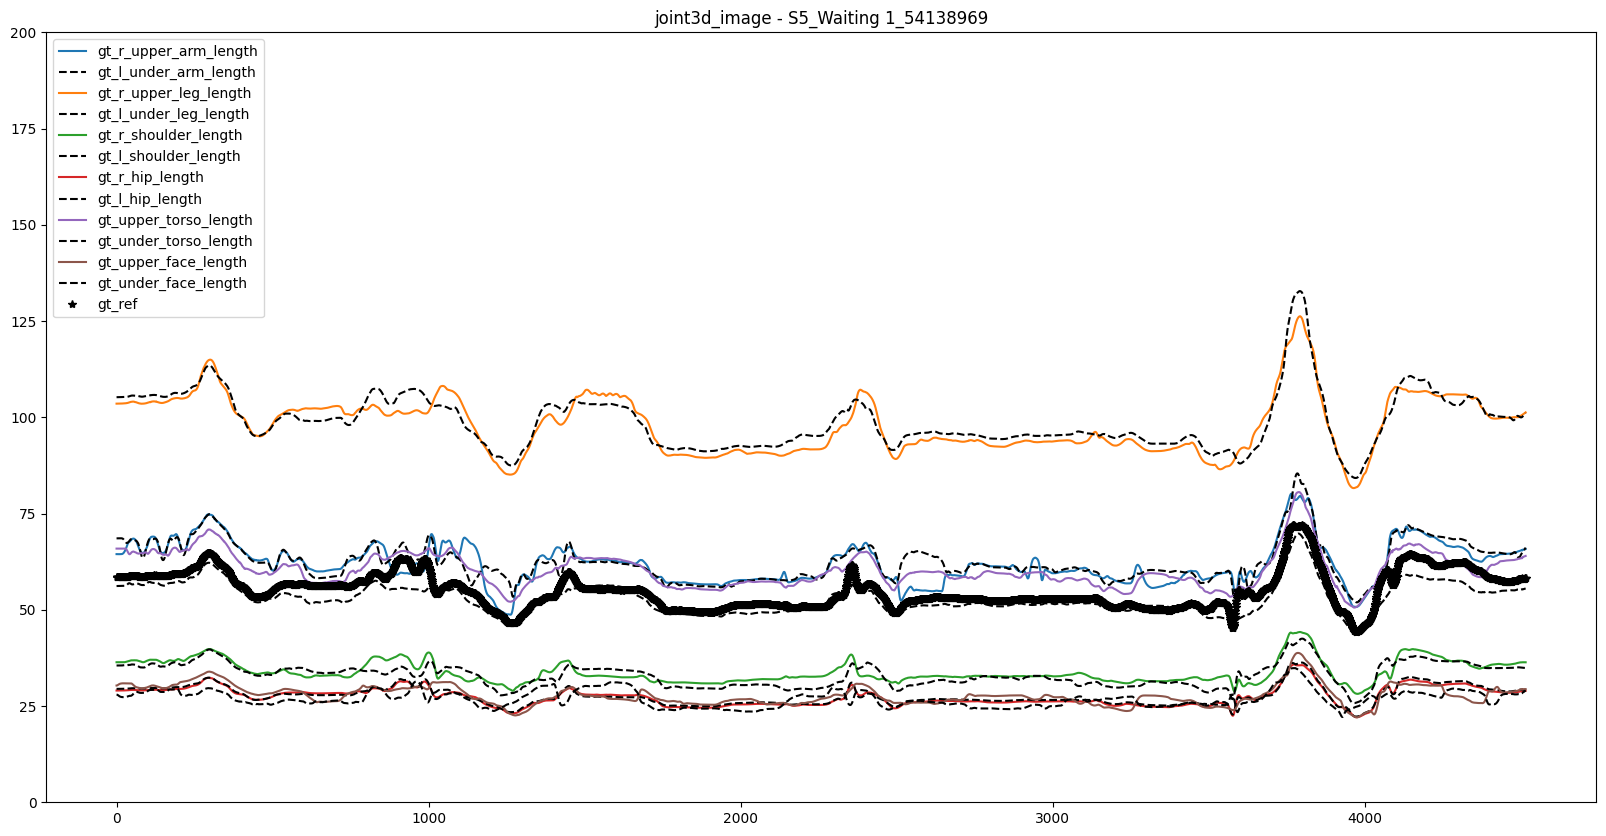

In [66]:
%matplotlib inline
fig = plt.figure(10, figsize=(20, 10))
fig.clear()
ax1 = fig.add_subplot(111)
ax1.plot(gt_length[:, len_ids['R_UPPER_ARM']], label='gt_r_upper_arm_length')
ax1.plot(gt_length[:, len_ids['L_UPPER_ARM']], 'k--', label='gt_l_under_arm_length')
ax1.plot(gt_length[:, len_ids['R_UPPER_LEG']], label='gt_r_upper_leg_length')
ax1.plot(gt_length[:, len_ids['L_UPPER_LEG']], 'k--', label='gt_l_under_leg_length')
ax1.plot(gt_length[:, len_ids['R_SHOULDER']], label='gt_r_shoulder_length')
ax1.plot(gt_length[:, len_ids['L_SHOULDER']], 'k--', label='gt_l_shoulder_length')
ax1.plot(gt_length[:, len_ids['R_HIP']], label='gt_r_hip_length')
ax1.plot(gt_length[:, len_ids['L_HIP']], 'k--', label='gt_l_hip_length')
ax1.plot(gt_length[:, len_ids['UPPER_TORSO']], label='gt_upper_torso_length')
ax1.plot(gt_length[:, len_ids['UNDER_TORSO']], 'k--', label='gt_under_torso_length')
ax1.plot(gt_length[:, len_ids['UPPER_FACE']], label='gt_upper_face_length')
ax1.plot(gt_length[:, len_ids['UNDER_FACE']], 'k--', label='gt_under_face_length')
ax1.plot(gt_ref, 'k*', label='gt_ref')
ax1.legend(loc='upper left')
#ax1.set_ylim(0, 0.5)
ax1.set_title(f'joint3d_image - {subject}_{action}_{camera_id}')
ax1.set_ylim(0, 200)

plt.show()

In [69]:
gt_length[:, len_ids['R_UPPER_ARM']][-1] / gt_ref[-1]

1.1299725925796504

In [68]:
gt_length[:, len_ids['R_UPPER_ARM']]/gt_ref

array([1.10222332, 1.1021485 , 1.10211286, ..., 1.13079826, 1.13032463,
       1.12997259])

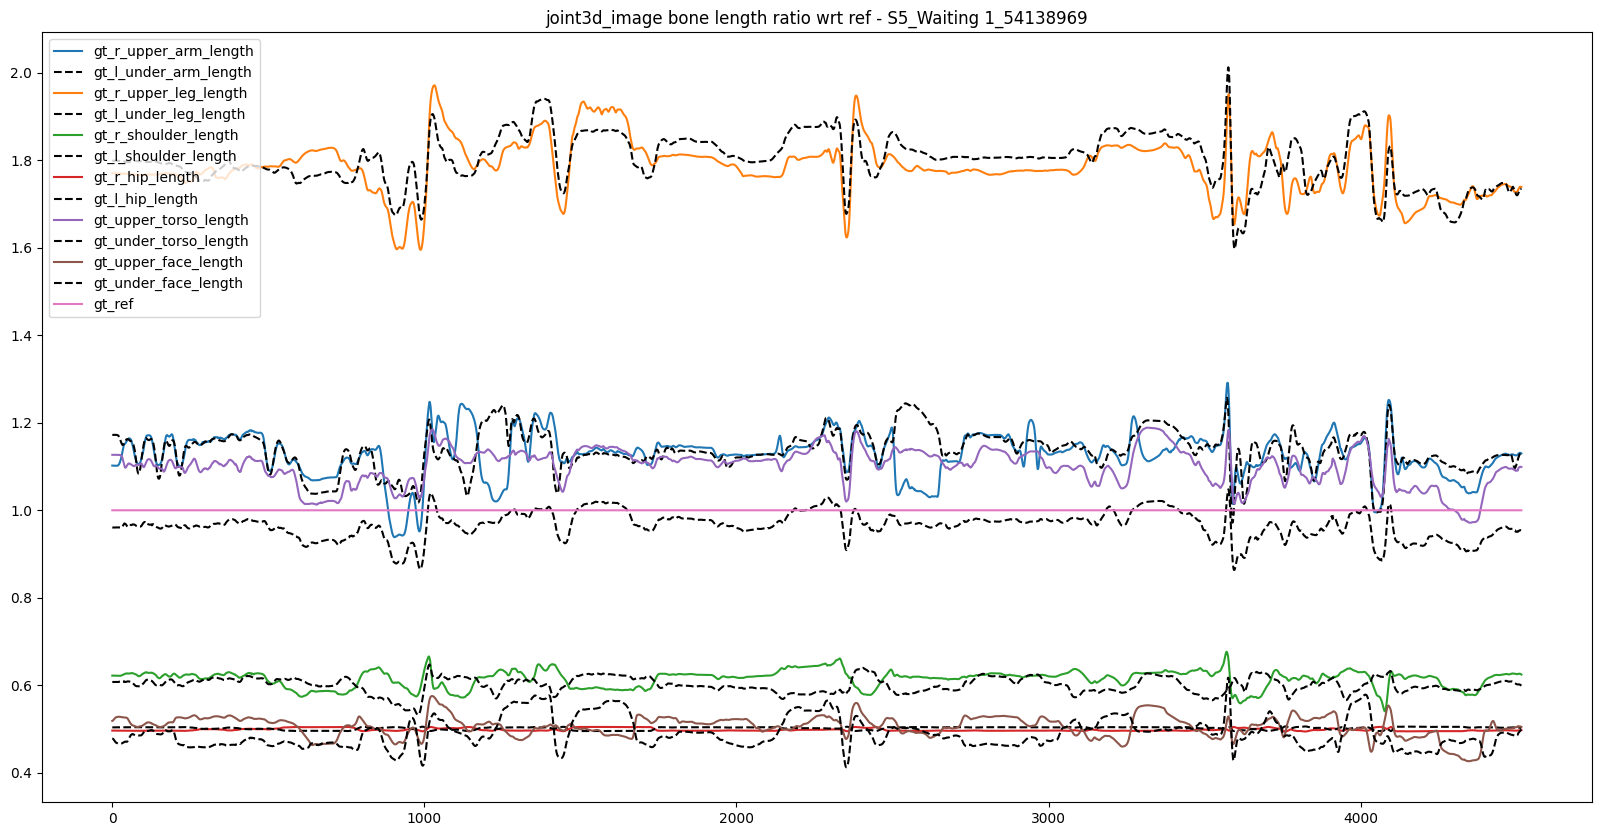

In [75]:
%matplotlib inline
fig = plt.figure(11, figsize=(20, 10))
fig.clear()
ax1 = fig.add_subplot(111)
ax1.plot(gt_length[:, len_ids['R_UPPER_ARM']]/gt_ref, label='gt_r_upper_arm_length')
ax1.plot(gt_length[:, len_ids['L_UPPER_ARM']]/gt_ref, 'k--', label='gt_l_under_arm_length')
ax1.plot(gt_length[:, len_ids['R_UPPER_LEG']]/gt_ref, label='gt_r_upper_leg_length')
ax1.plot(gt_length[:, len_ids['L_UPPER_LEG']]/gt_ref, 'k--', label='gt_l_under_leg_length')
ax1.plot(gt_length[:, len_ids['R_SHOULDER']]/gt_ref, label='gt_r_shoulder_length')
ax1.plot(gt_length[:, len_ids['L_SHOULDER']]/gt_ref, 'k--', label='gt_l_shoulder_length')
ax1.plot(gt_length[:, len_ids['R_HIP']]/gt_ref, label='gt_r_hip_length')
ax1.plot(gt_length[:, len_ids['L_HIP']]/gt_ref, 'k--', label='gt_l_hip_length')
ax1.plot(gt_length[:, len_ids['UPPER_TORSO']]/gt_ref, label='gt_upper_torso_length')
ax1.plot(gt_length[:, len_ids['UNDER_TORSO']]/gt_ref, 'k--', label='gt_under_torso_length')
ax1.plot(gt_length[:, len_ids['UPPER_FACE']]/gt_ref, label='gt_upper_face_length')
ax1.plot(gt_length[:, len_ids['UNDER_FACE']]/gt_ref, 'k--', label='gt_under_face_length')
ax1.plot(gt_ref/gt_ref, label='gt_ref')
ax1.legend(loc='upper left')
ax1.set_title(f'joint3d_image bone length ratio wrt ref - {subject}_{action}_{camera_id}')

plt.show()

In [74]:
gt_length[:, len_ids['UPPER_FACE']]/gt_ref

array([0.5185349 , 0.51868632, 0.51934312, ..., 0.50523326, 0.50490085,
       0.50471795])